In [1]:
from keras.models import load_model
import pandas as pd
import numpy as np
import glob
import random
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [13]:
#Load the photos with OpenCV2 on images, using imread
target = pd.read_csv(r'C:\...\rot_img/train_truth.csv')
names = target['fn']

images = []
for name in names:
    aux = './train/train/' + name
    images.append(cv2.imread(aux,1))

In [104]:
target

array([0, 0, 2, ..., 0, 0, 1])

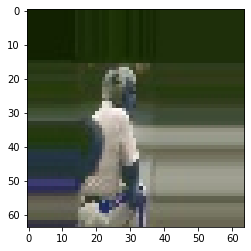

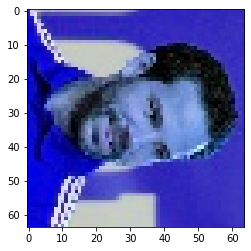

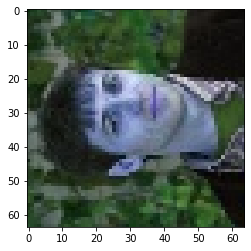

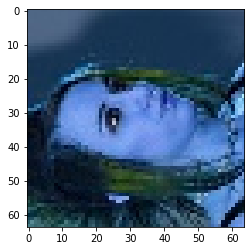

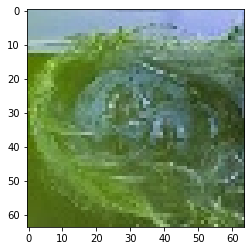

In [15]:
#let's see some sample images
samples = random.sample(images,5)
for i in samples:
    plt.figure()
    plt.imshow(i)

In [50]:
#Encode the labels
LE = LabelEncoder()
target = LE.fit_transform(target['label'])
target

array([0, 0, 2, ..., 0, 0, 1])

In [51]:
target = np.array(target)
target

array([0, 0, 2, ..., 0, 0, 1])

In [52]:
#split data intro train and test
train_x,test_x,train_y,test_y = train_test_split(images,target,test_size = 0.33)
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)


In [53]:
#one hot encoding
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [54]:
train_x = train_x.astype('float32')
train_y = train_y.astype('float32')
test_x = test_x.astype('float32')
test_y = test_y.astype('float32')

test_y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [55]:
#normalization of input
train_x /= 255
test_x /= 255



In [86]:
def model_1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',  input_shape=(64,64,3)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(4, (1, 1), padding='valid'))

    model.add(GlobalAveragePooling2D())
    
    model.add(Activation('softmax'))
    
    model.summary()
    
    return model

In [83]:
def model_2():
    
    model = Sequential()
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', input_shape=(64,64,3)))    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same'))  
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))
    
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(4, (1, 1), padding='valid'))

    model.add(GlobalAveragePooling2D())
    
    model.add(Activation('softmax'))

    model.summary()
    
    return model

In [87]:
model = model_1()
  
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001), # LR = learning rate
                metrics = ['accuracy']) # Metrics to be evaluated by the model


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 64, 64, 32)        896       
_________________________________________________________________
activation_103 (Activation)  (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_104 (Activation)  (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 31, 31, 64)      

In [84]:
model = model_2()
  
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001), # LR = learning rate
                metrics = ['accuracy']) # Metrics to be evaluated by the model


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 64, 64, 96)        2688      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64, 64, 96)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 64, 64, 96)        83040     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 32, 32, 96)        83040     
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_101 (Activation)  (None, 32, 32, 96)      

In [ ]:
model_details = model.fit(train_x, train_y,
                      batch_size = 32,
                      epochs = 10, # number of iterations
                      validation_data= (test_x,test_y),
                      verbose=1)

In [ ]:
model.save('test2.h5')

In [90]:
model = load_model('test1.h5')

In [91]:
def rotate(model,image):
    image_pred = image.reshape(1,64,64,3)
    output = model.predict(image_pred)
    value = output.argmax()          #get the index of the encoded output
    angle = 0
    
    if value  == 1:      #right
        angle = 90

    elif value == 0:    #left
        angle = 270

    elif value == 3:    #down
        angle = 180
        
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result


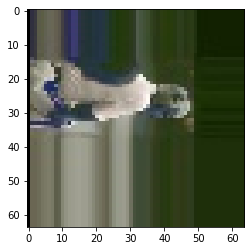

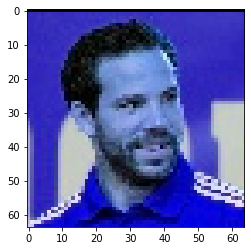

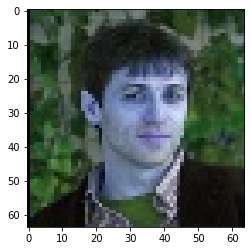

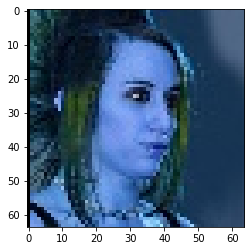

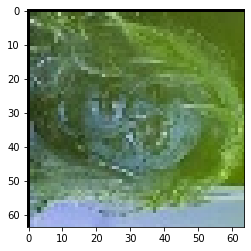

In [109]:
for i in samples:
    img = rotate(model,i)
    plt.figure()
    plt.imshow(img)

In [ ]:
if __name__ == '__main__':
    model = load_model('test1.h5')
    corrected = []
    for file in glob.glob("./test/*.jpg"):
        image_aux = cv2.imread(file,1)
        new_image = rotate(model,image_aux)
        corrected.append(new_image)
    
    corrected = np.array(corrected)
    np.save('np_out',corrected)


In [ ]:

np.savetxt("pred.csv", corrected, delimiter=",")

In [69]:
a = np.save('np_out',corrected)

In [72]:
loaded_array = np.load('np_out.npy')

array([[[[  0,   0,   0],
         [ 73, 160, 246],
         [ 73, 160, 246],
         ...,
         [ 10,  31,  76],
         [105, 137, 180],
         [158, 202, 249]],

        [[  0,   0,   0],
         [ 73, 160, 246],
         [ 73, 160, 246],
         ...,
         [  9,  30,  75],
         [109, 138, 182],
         [161, 203, 250]],

        [[  0,   0,   0],
         [ 73, 160, 246],
         [ 73, 160, 246],
         ...,
         [ 12,  31,  74],
         [111, 138, 182],
         [160, 200, 248]],

        ...,

        [[  0,   0,   0],
         [ 33,  94, 187],
         [ 33,  94, 187],
         ...,
         [ 26,  26,  32],
         [ 32,  32,  38],
         [ 26,  23,  25]],

        [[  0,   0,   0],
         [ 43,  94, 180],
         [ 43,  94, 180],
         ...,
         [ 24,  27,  31],
         [ 29,  32,  37],
         [ 15,  16,  20]],

        [[  0,   0,   0],
         [ 45,  92, 174],
         [ 45,  92, 174],
         ...,
         [ 27,  32,  35],
        

In [111]:
score = model.evaluate(test_x,
 test_y,
 batch_size=32)

16136/16136 [==============================] - 234s 15ms/step


In [112]:
score

[0.409920653672755, 0.8533093929290771]

In [113]:
print(model.metrics_names)

['loss', 'accuracy']
